# Mission briefing: Operation Smart or Ultra?
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. You have access to behavior data about subscribers who have already switched to the new plans. For this classification task, you need to develop a model that will pick the right plan. Since you are working with pre-processed data, you can move straight to creating the model. 

**Goal:** Develop a model that recommends one of Megaline's plans: Smart or Ultra with the highest possible accuracy. The threshold for accuracy is 0.75.

### Understanding the data
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows: 
- сalls — number of calls
- minutes — total call duration in minutes
- messages — number of text messages
- mb_used — Internet traffic used in MB
- is_ultra — plan for the current month (Ultra - 1, Smart - 0)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Our first step is to split this data into training, validation, and test sets. Training data will be used to train the model and learn patterns in the data. Validation data will be used to tune hyperparameters and select the best model. Lastly, test data will be used to evaluate the model's performance and generalizability on unseen data.

In [3]:
# split into training, validation, and test sets
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=12345)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

In [4]:
# declare variables for features and target
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [5]:
print('Shapes of datasets: \n')
print('features_train: ', features_train.shape)
print('target_train:   ', target_train.shape)
print('\nfeatures_valid: ', features_valid.shape)
print('target_valid:   ', target_valid.shape)
print('\nfeatures_test:  ', features_test.shape)
print('target_test:    ', target_test.shape)

Shapes of datasets: 

features_train:  (2249, 4)
target_train:    (2249,)

features_valid:  (482, 4)
target_valid:    (482,)

features_test:   (483, 4)
target_test:     (483,)


### Building the model

Now lets use the Decision Tree Classifier as our learning algorithm. I experimented with different values of max depth from 1 to 5 using a loop to find the model resulting in highest accuracy.

In [6]:
best_depth = 0
best_accuracy_valid = 0
best_accuracy_train = 0
best_model_prediction = 0

for i in range(1,6):
    
    model = DecisionTreeClassifier(random_state = 12345, max_depth = i)
    
    # fit on training data
    model.fit(features_train, target_train) 
    
    # calculate training accuracy
    prediction_train = model.predict(features_train)
    accuracy_train = accuracy_score(target_train, prediction_train)
    
    # calculate validation accuracy
    prediction_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid, prediction_valid)
    
    print("max_depth = {} : training accuracy = {}, validation accuracy = {}".format(i, accuracy_train, accuracy_valid))
    
    if accuracy_valid > best_accuracy_valid:
        best_depth = i
        best_accuracy_valid = accuracy_valid
        best_accuracy_train = accuracy_train
        best_model_prediction = prediction_valid
    
print("\nThe best value for max_depth is {} with training accuracy of {} and validation accuracy of {}.".format(best_depth, best_accuracy_train, best_accuracy_valid))

max_depth = 1 : training accuracy = 0.7554468652734548, validation accuracy = 0.7510373443983402
max_depth = 2 : training accuracy = 0.7852378835037794, validation accuracy = 0.7800829875518672
max_depth = 3 : training accuracy = 0.8016896398399288, validation accuracy = 0.7863070539419087
max_depth = 4 : training accuracy = 0.8043574922187638, validation accuracy = 0.7883817427385892
max_depth = 5 : training accuracy = 0.8168074699866608, validation accuracy = 0.7614107883817427

The best value for max_depth is 4 with training accuracy of 0.8043574922187638 and validation accuracy of 0.7883817427385892.


In general, when we have a higher training accuracy compared to validation accuracy, this can indicate potential overfitting, where the model learns to perform well on the training data but fails to generalize to unseen data. Ideally, we would want to use a model that maximizes validation accuracy while mainting a high training accuracy. In this case, max_depth = 4 seems to strike a good balance, as it has a high training accuracy (0.804) and a relatively high validation accuracy (0.788). Although the training accuracy is a little bit higher than validation accuracy, it is not significant enough to imply that the model is overfitting

To further understand our model's predictions, let's plot a confusion matrix. This helps to compare predictions with actual values and understand the distribution of true/false positives and negatives.

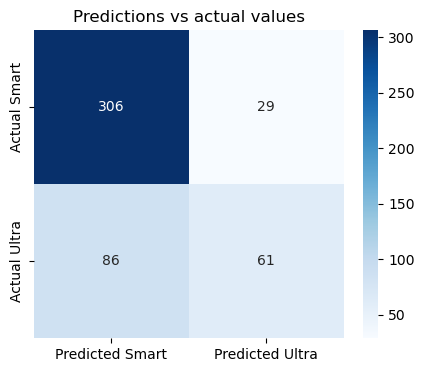

In [10]:
conf_matrix = confusion_matrix(target_valid, prediction_valid)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=['Predicted Smart', 'Predicted Ultra'], 
            yticklabels=['Actual Smart', 'Actual Ultra'])
plt.title('Predictions vs actual values')
plt.show()

In [12]:
# evaluate on test data
prediction_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, prediction_test)
print(accuracy_test)

0.7515527950310559


Although the accuracy score on test data was not as high as training and validation, it still passes the threshold for accuracy as stated in the mission briefing so we are good to go!

### Performing a sanity check
Let's compare the training and testing accuracy to check whether the model is overfitting. If the training accuracy is significantly higher, it may be overfitting.

Training accuracy: 0.8043574922187638\
Testing accuracy: 0.7515527950310559

Although the training accuracy is a little bit higher than testing accuracy, it is not significant enough to imply that the model is overfitting

### Summary
Megaline, a mobile carrier, aims to recommend either the Smart or Ultra plans to subscribers based on their behavior. The goal is to develop a model with an accuracy threshold of 0.75 using behavior data from subscribers who have already switched to the new plans.

1. Data was split into training, validation, and testing data.
2. The Decision Tree Classifier was chosen as the learning algorithm.
3. A loop was implemented to find the optimal value for the 'max_depth' hyperparameter with values from 1 to 5.
4. After tuning the 'max_depth' hyperparameter, it was determined that the ideal value is 4. A confusion matrix was created to help visualize the amount of values that were true positive, false positive, true negative, and false negative predictions. 
6. Testing accuracy was found to be 0.7515527950310559. To ensure the model's generalization ability, training and testing accuracy were compared. Although there is a difference between the accuracies, it is small enough to suggest that the model is not significantly overfitting.

In conclusion, the Decision Tree Classifier with a 'max_depth' of 4 is a suitable model for recommending Megaline's plans based on subscriber behavior. The model's accuracy meets the threshold of 0.75, and the slight difference between training and testing accuracy indicates that the model is well-balanced and not prone to overfitting. This model can be employed to recommend the appropriate plans to Megaline subscribers.